In [ ]:
import requests
import pandas as pd
from secret import API_KEY
from data import DATA

In [ ]:
champ = "Vayne"

In [ ]:
def getRecentGames(puuid, country):
    nb = 30
    return requests.get(f"https://{country}.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?type=ranked&start=0&count={nb}&api_key={API_KEY}").json()

In [ ]:
def getDFfromJson(champ):
    array = []
    for p in DATA[champ]["players"]:
        games = getRecentGames(p["puuid"], p["country"])
        
        for g in games:
            json = requests.get(f"https://{p['country']}.api.riotgames.com/lol/match/v5/matches/{g}?api_key={API_KEY}").json()
            index = json['metadata']['participants'].index(p["puuid"])
            print(index)
            player = json['info']['participants'][index]
            if player['championName'] != champ: continue
            if player['teamPosition'] != DATA[champ]["role"]: continue
            player['gameDuration'] = json['info']['gameDuration']
            array.append(pd.DataFrame({x: [player[x]] for x in DATA[champ]["columns"]}))

            
    return pd.concat(array).reset_index(drop=True)

In [ ]:
df = getDFfromJson(champ)

In [13]:
test = df['totalMinionsKilled']

In [9]:

import matplotlib.pyplot as plt

(array([2., 1., 2., 1., 3., 5., 3., 6., 3., 2., 3., 5., 0., 2., 0., 0., 1.,
        0., 0., 1.]),
 array([ 83.  ,  96.25, 109.5 , 122.75, 136.  , 149.25, 162.5 , 175.75,
        189.  , 202.25, 215.5 , 228.75, 242.  , 255.25, 268.5 , 281.75,
        295.  , 308.25, 321.5 , 334.75, 348.  ]),
 <BarContainer object of 20 artists>)

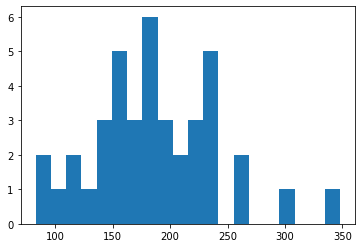

In [16]:
plt.hist(test, bins=20)